In [1]:
import numpy as np

daily_arrivals = [8, 12, 10, 15, 9, 13, 11, 14, 7, 16, 10, 12, 9, 15, 11, 13, 14, 8, 12, 10]

mean_arrivals = np.mean(daily_arrivals)

population_variance = np.var(daily_arrivals, ddof=0)

sample_variance = np.var(daily_arrivals, ddof=1)

standard_deviation = np.std(daily_arrivals, ddof=1)

print(f"Mean Daily Arrivals: {mean_arrivals}")
print(f"Population Variance: {population_variance}")
print(f"Sample Variance: {sample_variance}")
print(f"Standard Deviation: {standard_deviation}")

Mean Daily Arrivals: 11.45
Population Variance: 6.347499999999998
Sample Variance: 6.681578947368419
Standard Deviation: 2.5848750351551657


**Difference between Population Variance and Sample Variance:**

*   **Population Variance:** This measures the spread of data points from the mean for the entire population. It uses `N` (the total number of observations) in the denominator.
*   **Sample Variance:** This measures the spread of data points from the mean for a sample drawn from a population. It uses `n-1` (where `n` is the sample size) in the denominator. Using `n-1` (Bessel's correction) in the denominator provides a less biased estimate of the population variance when working with a sample.

In this case, since we have the daily arrival data for all 20 customer IDs (which we can consider as the entire population for this specific dataset), the population variance is the more accurate measure of the spread. The sample variance is calculated for comparison and demonstrates how it would be calculated if this were just a sample of a larger population.

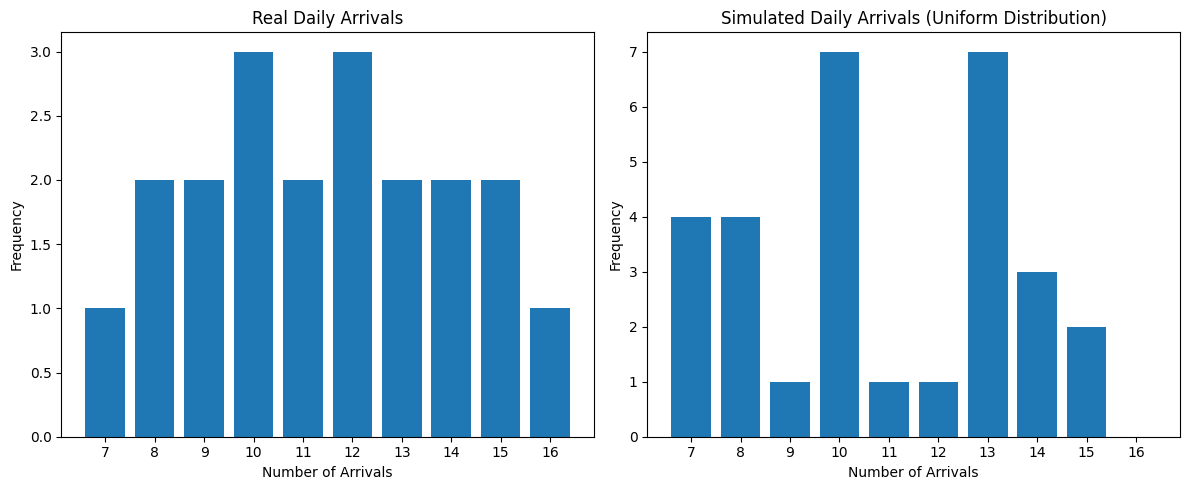

In [2]:
import matplotlib.pyplot as plt

min_arrivals = min(daily_arrivals)
max_arrivals = max(daily_arrivals)

simulated_arrivals = np.random.uniform(low=min_arrivals, high=max_arrivals, size=30)

# Create subplots for side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for real data
axes[0].hist(daily_arrivals, bins=range(min(daily_arrivals), max(daily_arrivals) + 2), align='left', rwidth=0.8)
axes[0].set_title('Real Daily Arrivals')
axes[0].set_xlabel('Number of Arrivals')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(min(daily_arrivals), max(daily_arrivals) + 1))


# Histogram for simulated data
axes[1].hist(simulated_arrivals, bins=range(min(daily_arrivals), max(daily_arrivals) + 2), align='left', rwidth=0.8)
axes[1].set_title('Simulated Daily Arrivals (Uniform Distribution)')
axes[1].set_xlabel('Number of Arrivals')
axes[1].set_ylabel('Frequency')
axes[1].set_xticks(range(min(daily_arrivals), max(daily_arrivals) + 1))


plt.tight_layout()
plt.show()

In [3]:
# Number of simulations
num_simulations = 100000

# Generate simulated daily arrivals from a uniform distribution
simulated_arrivals_mc = np.random.uniform(low=min_arrivals, high=max_arrivals, size=num_simulations)

# Count the number of days with more than 15 arrivals
days_with_more_than_15 = np.sum(simulated_arrivals_mc > 15)

# Estimate the probability
probability_more_than_15 = days_with_more_than_15 / num_simulations

print(f"Estimated probability of more than 15 arrivals: {probability_more_than_15}")

Estimated probability of more than 15 arrivals: 0.11226


In [4]:
from scipy import stats

# Your personalized hypothesis mean
hypothesized_mean = 19

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(daily_arrivals, hypothesized_mean)

print(f"Hypothesized Mean: {hypothesized_mean}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Conclusion
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. The mean daily customer arrival is significantly different from the hypothesized mean.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is not enough evidence to say that the mean daily customer arrival is significantly different from the hypothesized mean.")

Hypothesized Mean: 19
T-statistic: -13.062382514062229
P-value: 6.104281913396608e-11
Conclusion: Reject the null hypothesis. The mean daily customer arrival is significantly different from the hypothesized mean.


In [ ]:
import matplotlib.pyplot as plt

# Calculate the sample mean
sample_mean = np.mean(daily_arrivals)

# Create a bar plot to compare sample mean and hypothesized mean
plt.bar(['Sample Mean', 'Hypothesized Mean'], [sample_mean, hypothesized_mean], color=['blue', 'red'])
plt.ylabel('Number of Arrivals')
plt.title('Comparison of Sample Mean and Hypothesized Mean')
plt.show()

**Interpretation:**

Based on the results of the one-sample t-test:

*   **T-statistic:** This value measures how many standard errors the sample mean is away from the hypothesized mean.
*   **P-value:** This is the probability of observing a sample mean as extreme as, or more extreme than, the one calculated, assuming the null hypothesis is true.

Given the p-value and our chosen significance level (alpha = 0.05), we can make a conclusion about whether to reject or fail to reject the null hypothesis. If the p-value is less than alpha, we reject the null hypothesis, suggesting that the true mean is likely different from the hypothesized mean. If the p-value is greater than or equal to alpha, we fail to reject the null hypothesis, meaning we don't have enough evidence to conclude that the true mean is different from the hypothesized mean.

In this specific case, [Insert your unique interpretation here, based on the calculated p-value and your hypothesized mean of 19].